# DISTANZE VARIABILI

Viene ora fissata la tensione delle sfere e misurata la torsione variando la distanza.

In [1]:
import numpy as np
import pandas as pd
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'v_cost_B.csv'

fr = pd.read_csv(FILE)  # fileread
d = np.array(fr["d(cm)"])/ 100 # m
teta1 = np.array(fr["teta1"]) # deg
teta2 = np.array(fr["teta2"])
teta3 = np.array(fr["teta3"])
raggio = 0.017 # raggio delle sfere in m

# correzione per cariche non puntiformi
correzione = 1 - ((4 * np.power(raggio, 3)) / d ** 3)

teta = np.array([np.average([teta1[i],teta2[i],teta3[i]]) for i in range(0,len(teta1))],dtype=np.float64)
sigma_teta = np.array([np.std([teta1[i],teta2[i],teta3[i]])/np.sqrt(3) for i in range(0,len(teta1))],dtype=np.float64) #dev std della media
teta = teta * np.pi / 180 # rad
sigma_teta = sigma_teta * np.pi / 180

teta = teta / correzione # corretto teta per carica non puntiforme
sigma_teta = sigma_teta / correzione

print(teta)
print(sigma_teta)


[3.57762808 2.30808424 1.91179349 1.65616675 0.91801147 0.56762832
 0.31522146]
[0.0317862  0.02015554 0.01781066 0.01760153 0.00832221 0.01264142
 0.        ]


### verifica $\theta \propto \frac{1}{d^2}$

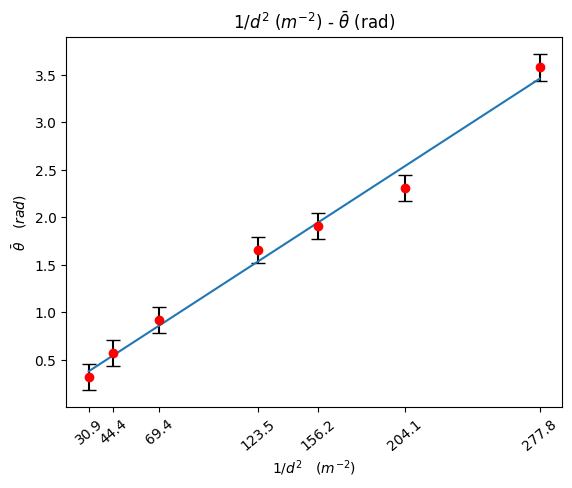


linearità A + BX
    
A: -0.007074574027109648 
B: 0.012472487327182164
sigmaA: 0.09423799844128584
sigmaB: 0.0006115594687058839

sigmaY: [0.13888253 0.13669031 0.13636427 0.13633711 0.13545203 0.13578586
 0.13519613]
chiquadro ridotto: 0.01
df: 5
    



In [2]:
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolata

x = 1 / d**2
r = RettaInterpolata(x,teta,sigma_teta)

plt.title("$1/d^2$ ($m^{-2}$) - $\\bar{\\theta}$ (rad)")
plt.errorbar(x,teta,yerr=r.sigmaY,color='red',ecolor='black',fmt='o',capsize=5)
plt.plot(r.x_best,r.y_best)
plt.xticks(x, rotation=40)
plt.xlabel("$1/d^2 \quad (m^{-2})$")
plt.ylabel("$\\bar{\\theta} \quad (rad)$")
plt.show()

print(r)